Дан датасет с данными 

Дан датасет market_data.txt, содержащий некоторые реальные данные, относящиеся к маркетинговой кампании, проводимой
банком. 
Целью маркетинговой кампании было побудить клиентов открыть депозит.
Сделали они это или нет - это переменная «y» в наборе данных.

Построить графики на основании данных датасета для проведения анализа маркетинговой кампании.

# Импорт необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка данных

In [ ]:
path_market_data = "/content/drive/MyDrive/Colab Notebooks/data/market_data.txt"
X = pd.read_csv(path_market_data, delimiter="\t")

In [ ]:
# переназовем некоторые столбцы для лучшего восприятия
X = X.rename(columns={'default': 'credit', 'housing': 'housing_loan', 'loan':'personal_loan', 'campaign':'number_of_contacts', 'previous':'previous_number_of_contacts', 'poutcome':'previous_result', 'y':'opening_deposit'})
X

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,day,month,duration,number_of_contacts,pdays,previous_number_of_contacts,previous_result,opening_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Проверка данных

In [ ]:
# проверка на наличие дубликатов строк. результат - False по всем 45211 строкам, т.е. дублей строк нет.
X.duplicated().value_counts()

False    45211
dtype: int64

In [ ]:
# проверка отсутствующих значений. результат - Nan отсутствуют.
X.isnull().sum()

age                            0
job                            0
marital                        0
education                      0
credit                         0
balance                        0
housing_loan                   0
personal_loan                  0
contact                        0
day                            0
month                          0
duration                       0
number_of_contacts             0
pdays                          0
previous_number_of_contacts    0
previous_result                0
opening_deposit                0
dtype: int64

In [ ]:
# количество значений 0
(X == 0).sum()

age                                0
job                                0
marital                            0
education                          0
credit                             0
balance                         3514
housing_loan                       0
personal_loan                      0
contact                            0
day                                0
month                              0
duration                           3
number_of_contacts                 0
pdays                              0
previous_number_of_contacts    36954
previous_result                    0
opening_deposit                    0
dtype: int64

In [ ]:
# количество значений unknown
(X == 'unknown').sum()

age                                0
job                              288
marital                            0
education                       1857
credit                             0
balance                            0
housing_loan                       0
personal_loan                      0
contact                        13020
day                                0
month                              0
duration                           0
number_of_contacts                 0
pdays                              0
previous_number_of_contacts        0
previous_result                36959
opening_deposit                    0
dtype: int64

In [ ]:
X.nunique()

age                              77
job                              12
marital                           3
education                         4
credit                            2
balance                        7168
housing_loan                      2
personal_loan                     2
contact                           3
day                              31
month                            12
duration                       1573
number_of_contacts               48
pdays                           559
previous_number_of_contacts      41
previous_result                   4
opening_deposit                   2
dtype: int64

In [ ]:
X.dtypes

age                             int64
job                            object
marital                        object
education                      object
credit                         object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
number_of_contacts              int64
pdays                           int64
previous_number_of_contacts     int64
previous_result                object
opening_deposit                object
dtype: object

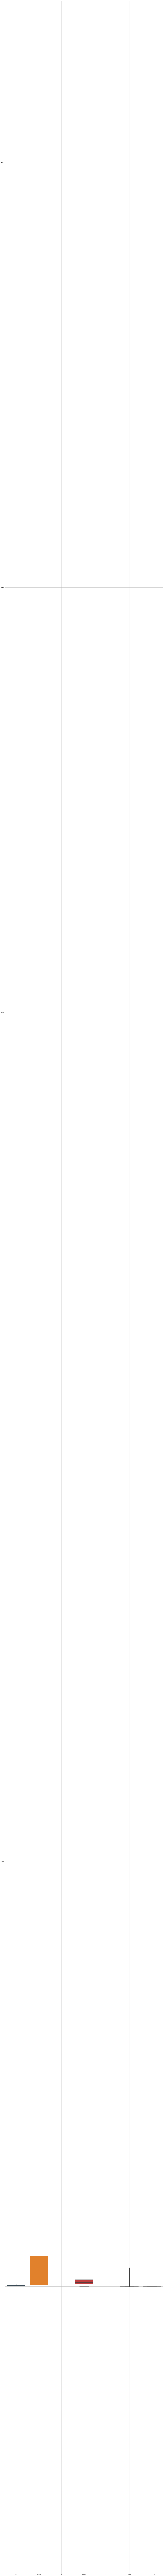

In [ ]:
# поиск и анализ "выбросов" с помощью boxplot
# замечены "выбросы" в balance, duration,	pdays,	previous_number_of_contacts. 
# разброс по balance допускаю, duration в 83мин. допускаю, большой период pdays допускаю, количество контактов до компании previous_number_of_contacts = 275 следует откоректировать.

plt.figure(figsize=(30,500))
sns.boxplot(data=X)
plt.grid(True)

In [ ]:
X.previous_number_of_contacts.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous_number_of_contacts, dtype: int64

In [ ]:
# выброс 275 контактов
X[X.previous_number_of_contacts == 275]

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,day,month,duration,number_of_contacts,pdays,previous_number_of_contacts,previous_result,opening_deposit
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [ ]:
# замена выброса на медиану значений по столбцу
X.at[29182,'previous_number_of_contacts'] = X.previous_number_of_contacts.median()

# Построение графиков, анализ и выводы

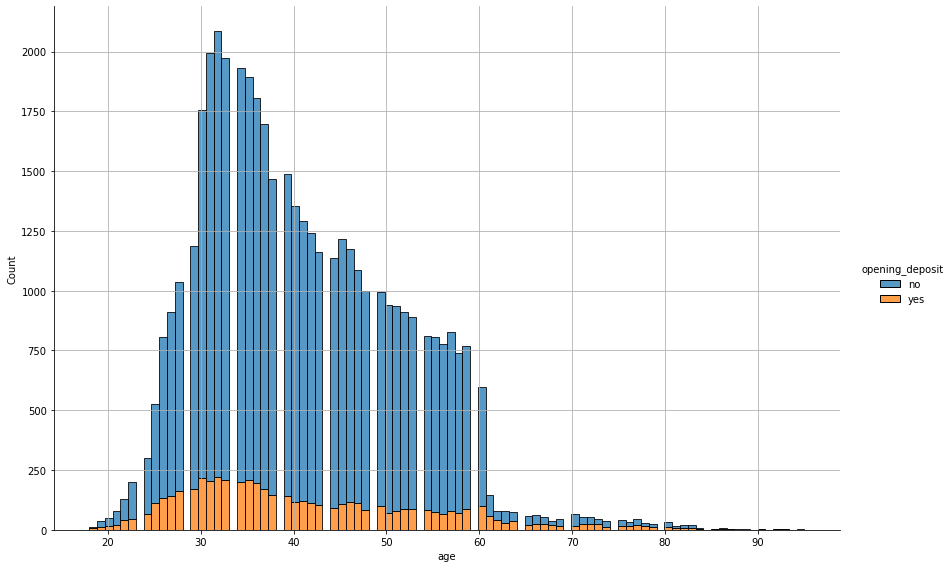

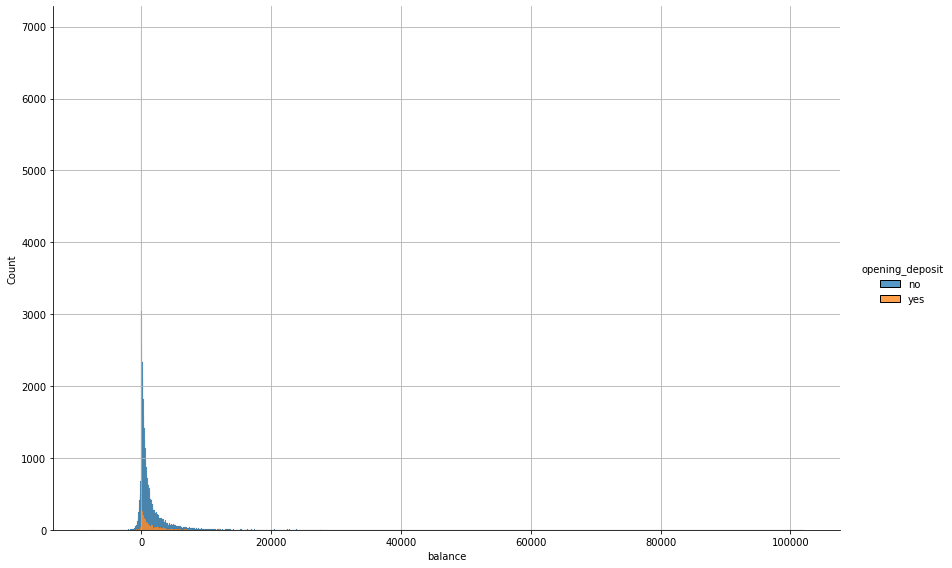

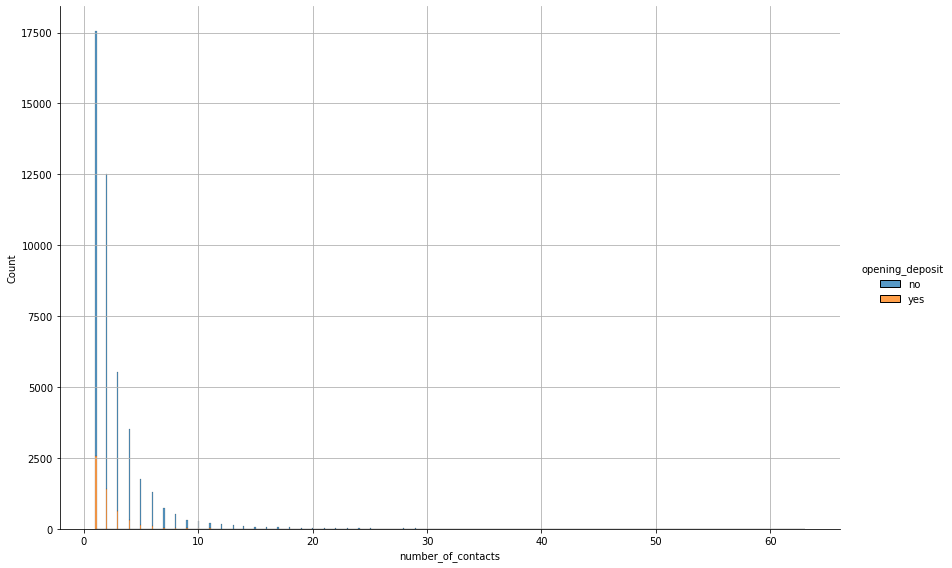

In [ ]:
# визуализация связи числовых исходных данных и результата маркетинговой компании
for cname in ['age', 'balance', 'number_of_contacts']:
    sns.displot(x=X[cname],  hue=X.opening_deposit, height = 8, aspect=1.5, multiple="stack")
    plt.grid(True)

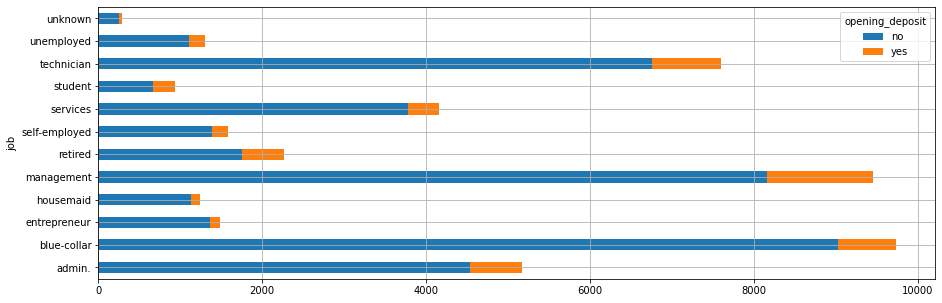

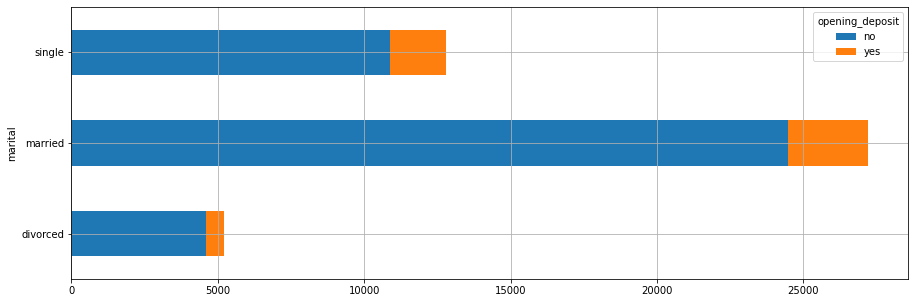

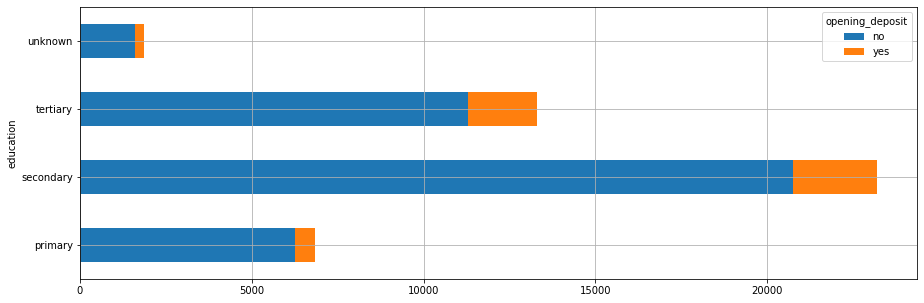

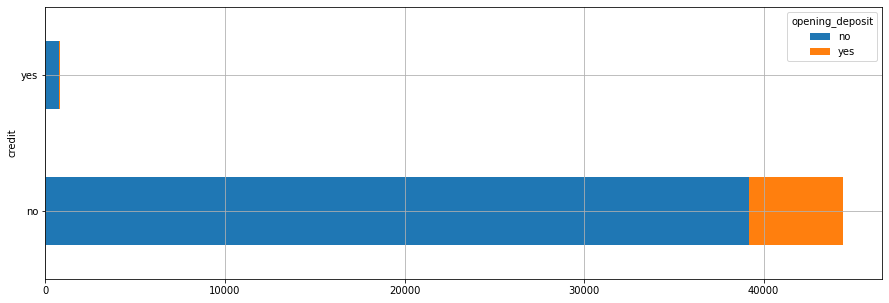

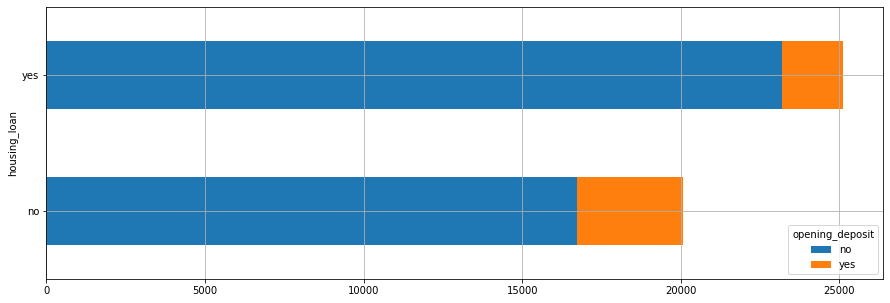

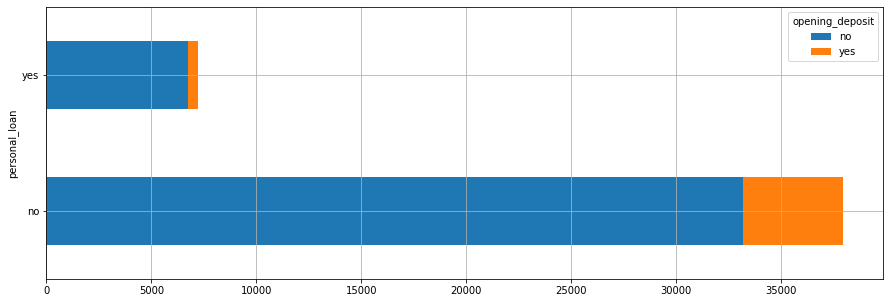

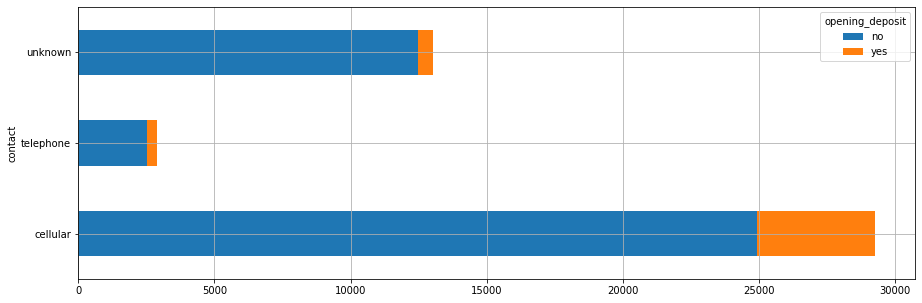

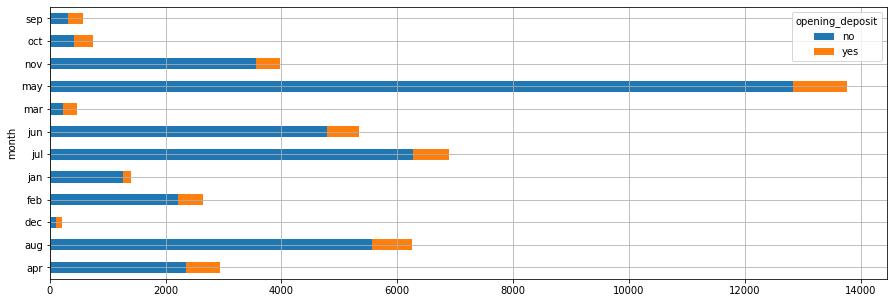

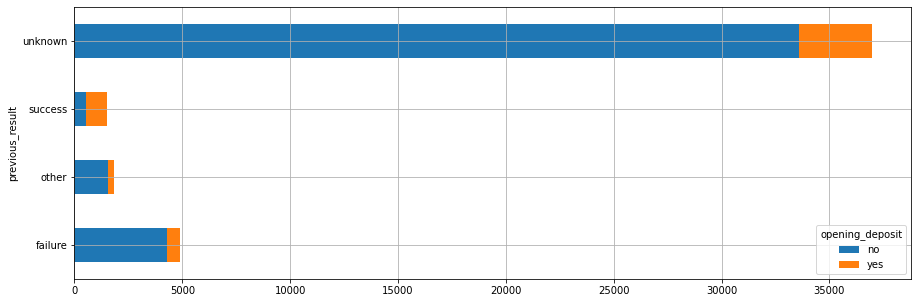

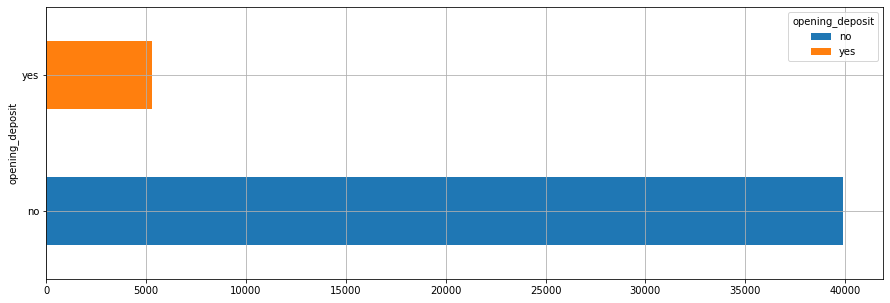

In [ ]:
# визуализация связи категориальных исходных данных и результата маркетинговой компании
for cname in X.columns:
  if X[cname].dtype == "object":
    pd.crosstab(X[cname], X['opening_deposit']).plot(kind='barh', stacked=True, figsize=(15, 5))
    plt.legend(title='opening_deposit')
    plt.grid(True)

In [ ]:
# расчеты для информации менеджера по маркетингу на ком стоит сфокусироваться в следующих компаниях
col_name = ['job',	'marital',	'education',	'credit',	'housing_loan',	'personal_loan']
for c_name in col_name:
  for cc_name in X[c_name].unique():
    print('% opening_deposit in', c_name, cc_name, 'is', round(
        (len(X[[c_name,'opening_deposit']][(X['opening_deposit']=='yes') & (X[c_name]==cc_name)]))/((X[c_name] == cc_name).sum())*100, ndigits=2))

% opening_deposit in job management is 13.76
% opening_deposit in job technician is 11.06
% opening_deposit in job entrepreneur is 8.27
% opening_deposit in job blue-collar is 7.27
% opening_deposit in job unknown is 11.81
% opening_deposit in job retired is 22.79
% opening_deposit in job admin. is 12.2
% opening_deposit in job services is 8.88
% opening_deposit in job self-employed is 11.84
% opening_deposit in job unemployed is 15.5
% opening_deposit in job housemaid is 8.79
% opening_deposit in job student is 28.68
% opening_deposit in marital married is 10.12
% opening_deposit in marital single is 14.95
% opening_deposit in marital divorced is 11.95
% opening_deposit in education tertiary is 15.01
% opening_deposit in education secondary is 10.56
% opening_deposit in education unknown is 13.57
% opening_deposit in education primary is 8.63
% opening_deposit in credit no is 11.8
% opening_deposit in credit yes is 6.38
% opening_deposit in housing_loan yes is 7.7
% opening_deposit in

In [ ]:
# количество нулевых значений контактов предыдущей маркетинговой компании соответствует количеству неизвестных результатов по предыдущей компании.
# очевидно, что при отсутствии контакта в предыдущей компании отсутствует и результат.
(X == 'unknown').sum()

age                                0
job                              288
marital                            0
education                       1857
credit                             0
balance                            0
housing_loan                       0
personal_loan                      0
contact                        13020
day                                0
month                              0
duration                           0
number_of_contacts                 0
pdays                              0
previous_number_of_contacts        0
previous_result                36959
opening_deposit                    0
dtype: int64

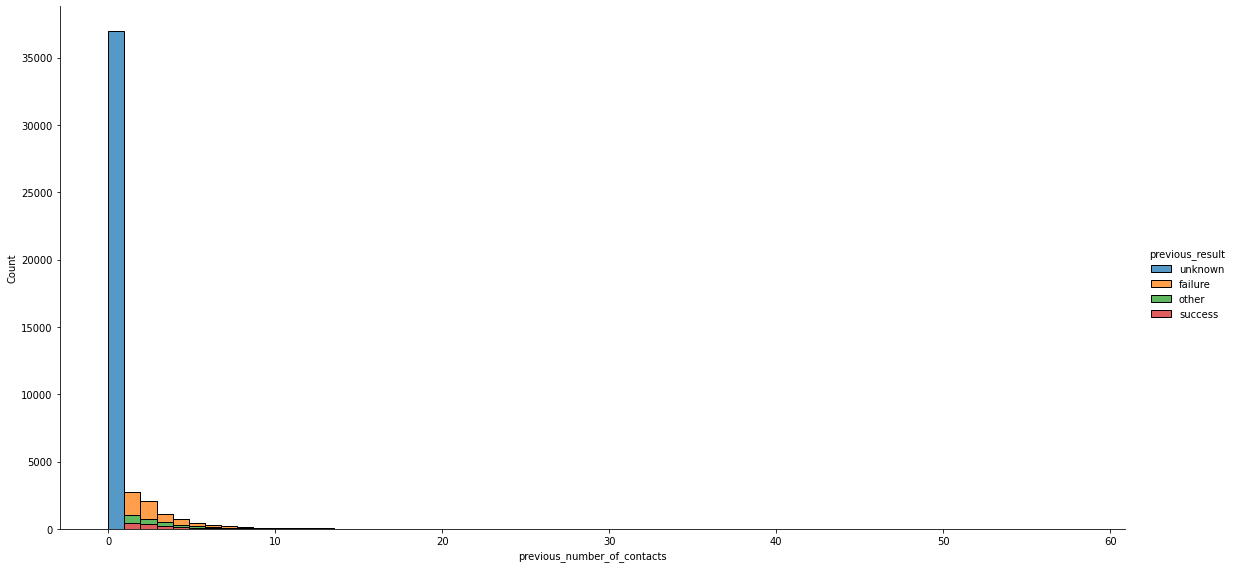

In [ ]:
sns.displot(x=X.previous_number_of_contacts,  hue=X.previous_result, height = 8, aspect=2, multiple="stack", bins=60)
plt.show()

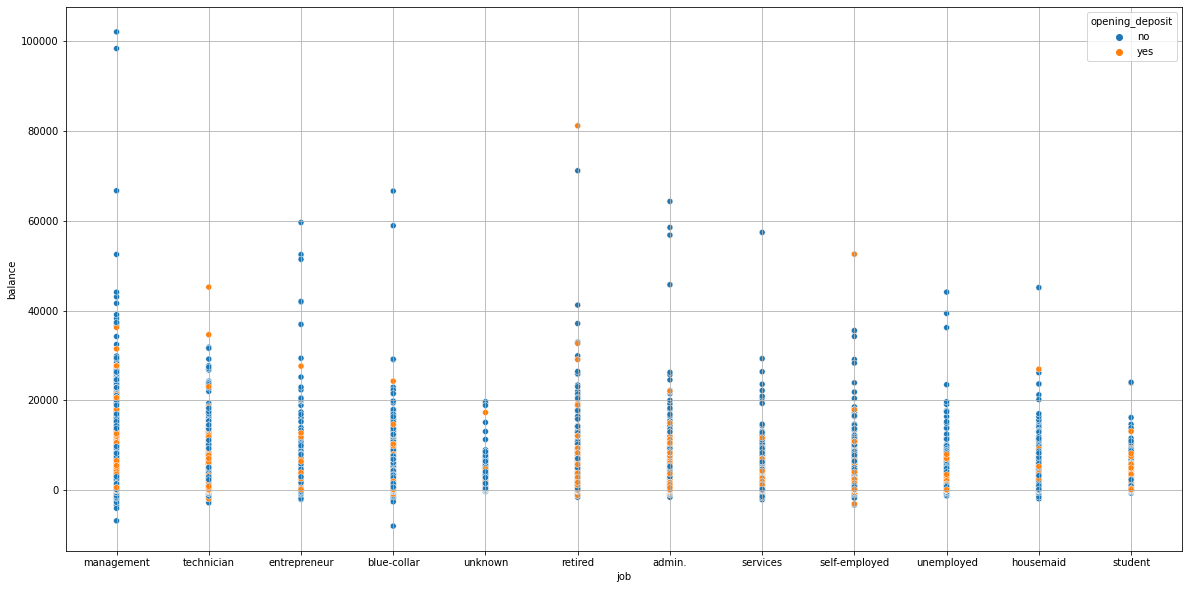

In [ ]:
# наименее заинтересованные в открытии депозита "blue-collar", "entrepreneur", 'housemaid'.
# у "unknown" профессии баланс соответствует уровню баланса "student" и малая доля открытия депозита
plt.figure(figsize=(20,10))
sns.scatterplot(x=X.job, y=X.balance, hue=X.opening_deposit)
plt.grid(True)

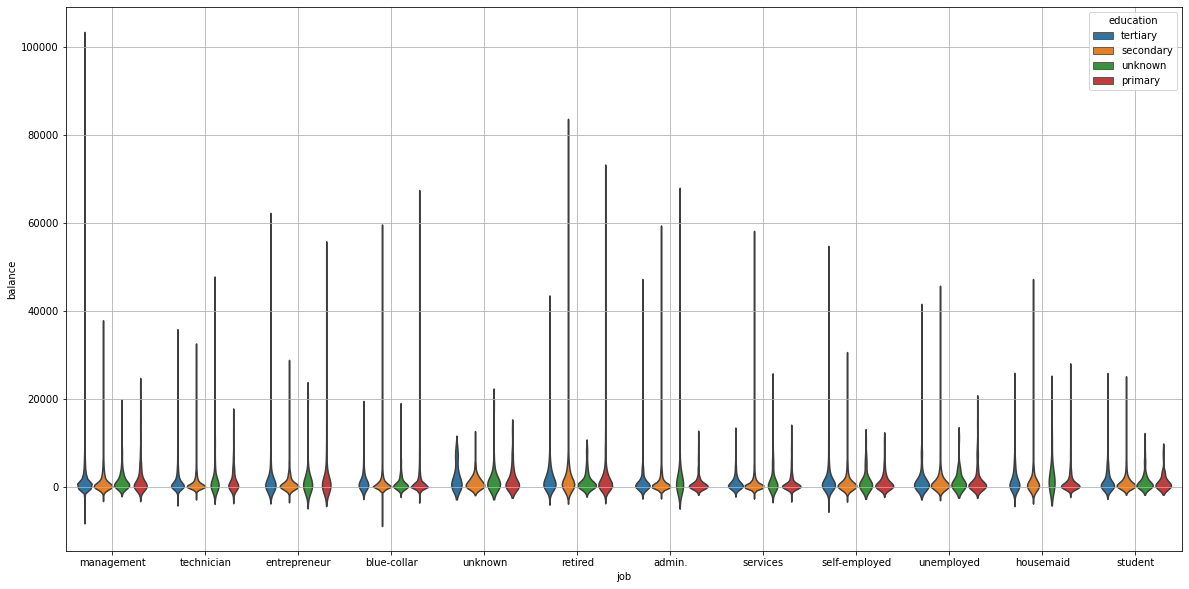

In [ ]:
# зависимость баланса от профессии и образования
plt.figure(figsize=(20,10))
sns.violinplot(x= "job", y="balance", hue = "education", data=X, inner=None)
plt.grid(True)

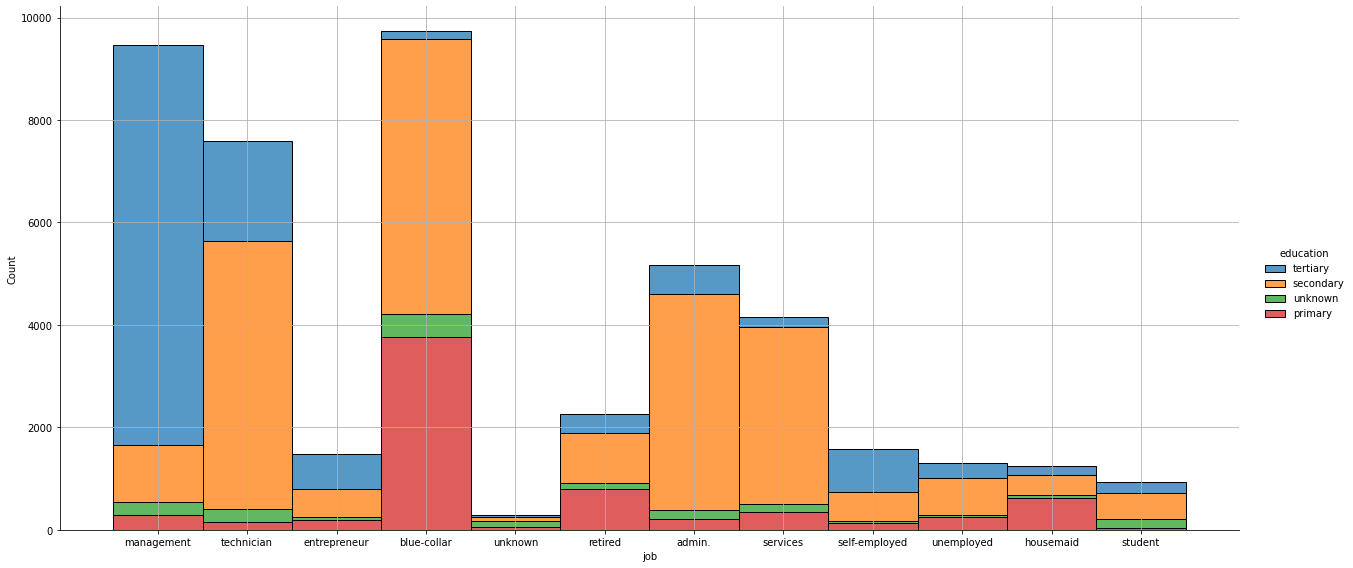

In [ ]:
# зависимость профессия/образование
sns.displot(x=X.job, hue=X.education, height = 8, aspect=2.2, multiple="stack")
plt.grid(True)

<Figure size 1080x720 with 0 Axes>

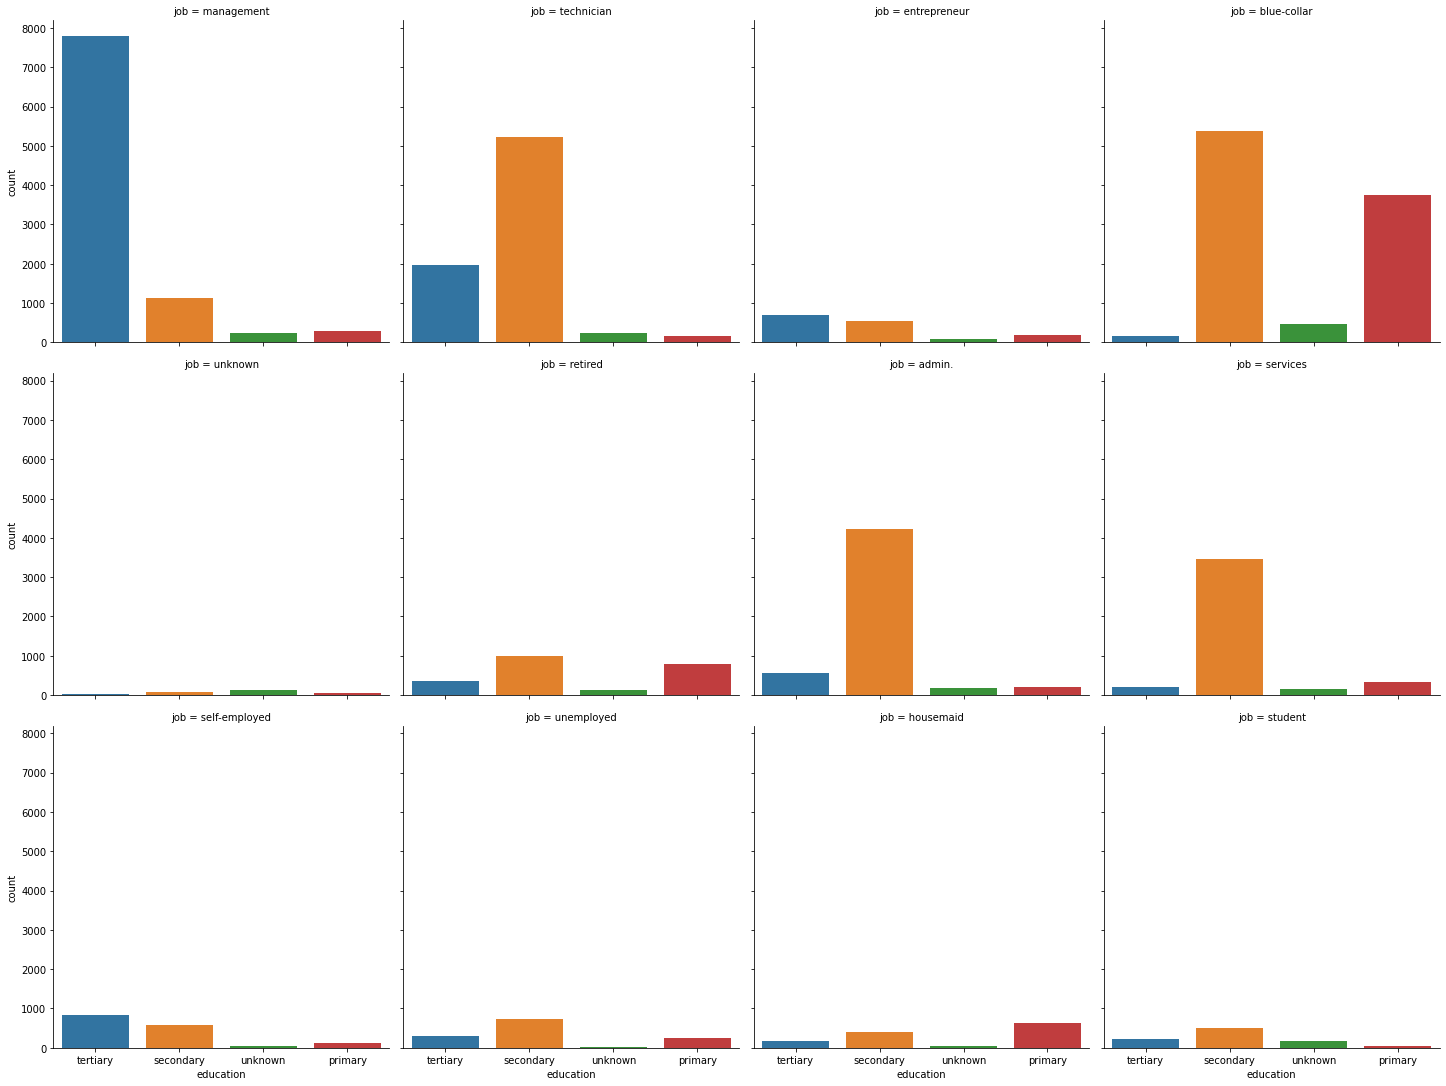

In [ ]:
# зависимость профессия/образование
plt.figure(figsize=(15,10))
sns.catplot(x='education', col="job", col_wrap=4, data=X, kind="count")

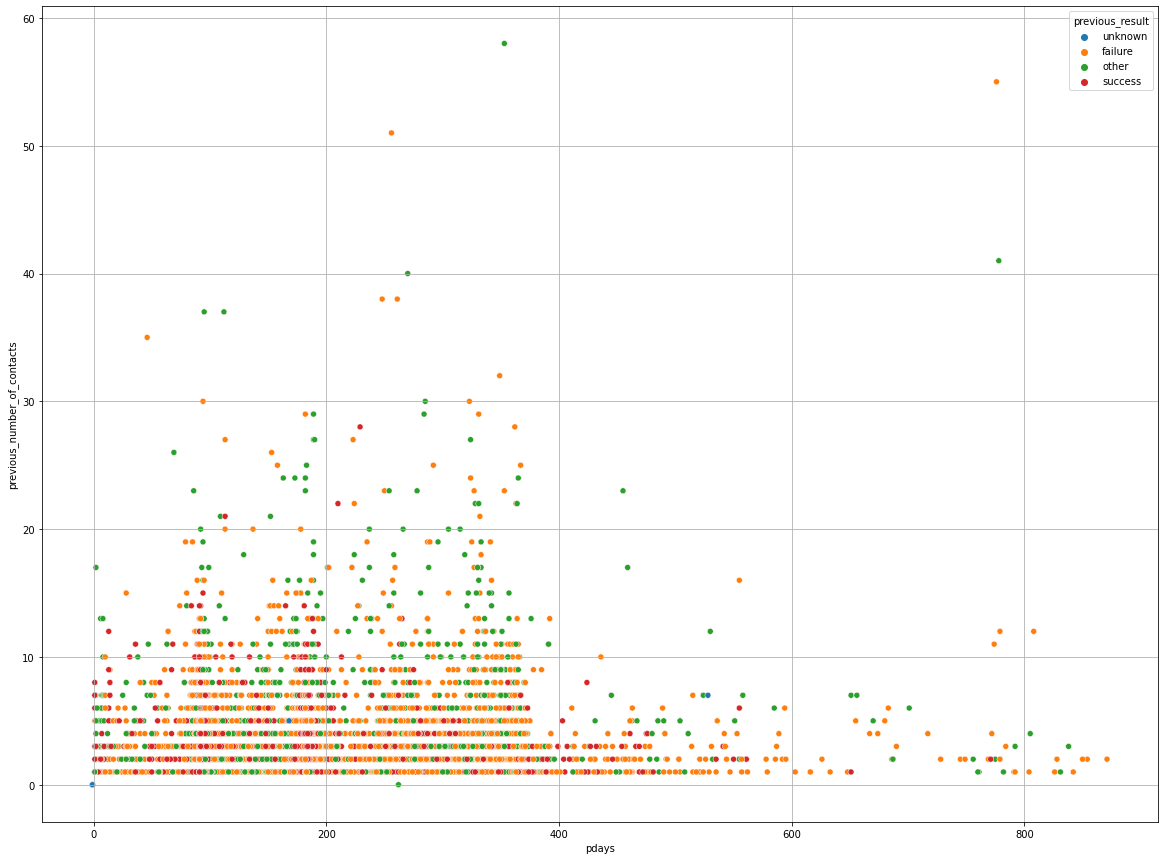

In [ ]:
# зависимость результата предыдущей компании от количества контактов и количествва дней прошедших после последней связи с клиентом.
# из графика видно что при увеличении количества контактов >10 в предыдущей компании и количества дней >400 ее успех снижается.
plt.figure(figsize=(20,15))
sns.scatterplot(x=X.pdays, y=X.previous_number_of_contacts, hue=X.previous_result)
plt.grid(True)